In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as colors
from matplotlib.lines import Line2D
import numpy as np
import dateutil
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
metab_file_grouping = pd.read_csv(r'..\data\metadata\metabolomics_file_grouping.csv', index_col = 0)
tf = pd.read_csv(r'..\data\interim\tf_raw_cleaned_metimp_imputed.csv', index_col=0)

animals_used = [1091, 1093, 1060, 1062, 1074, 1092, 1102, 1076, 1082, 1101]
diabetic = [1076, 1082, 1101]
impaired = [1060, 1062, 1074, 1092, 1102]
normal = [1091, 1093]
bg_dict = {'diabetic': diabetic, 'impaired': impaired, 'normal': normal}
animal_to_tolerance_dict = {1076: 'diabetic', 1082: 'diabetic',1101: 'diabetic',
                            1060: 'impaired', 1062: 'impaired', 1074: 'impaired',
                            1092: 'impaired', 1102: 'impaired', 1091: 'normal', 1093: 'normal',}

obs = pd.read_excel(r'..\data\metadata\20210421_FBGRBGOGTT_Huishi sample sheet.xlsx', sheet_name='cleaned')
obs['animal'] = obs['animal'].str.strip('TM').astype('int')
obs['datetime'] = obs['when'].apply(dateutil.parser.parse)
animal_phenotypes = pd.read_excel(r'..\data\metadata\20210421_FBGRBGOGTT_Huishi sample sheet.xlsx', sheet_name='animal phenotypes')
animal_phenotypes['animal'] = animal_phenotypes['animal'].str.strip('TM').astype('int')

In [4]:
quant_files = metab_file_grouping[metab_file_grouping['quant_file']]['File Name']

Text(-0.08, 1.03, 'A')

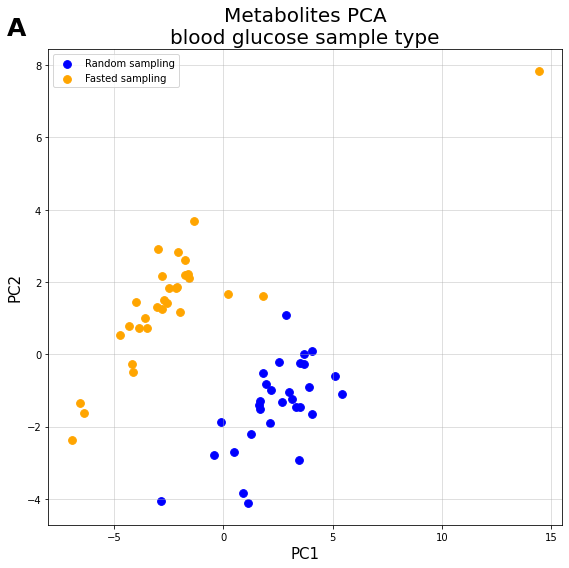

In [6]:
df = tf

pca_data = df[quant_files].T
# display(pca_data.index)

idx = pca_data.index.to_frame()
idx = idx.reset_index().drop(0, axis=1)
# display(idx)

n_components = 2
pca = PCA(n_components=n_components)

# Standard scaler is a little important for PCA
scaled = StandardScaler().fit_transform(pca_data)
# display(scaled)
fitted = pca.fit_transform(scaled)
# auto-name PCA columns as pc1, pc2... based on n_components
columns = ['pc' + str(x) for x in range(1, n_components + 1)]
fitted = pd.DataFrame(fitted, columns=columns)
fitted = fitted.join(idx)
fitted = fitted.merge(right=metab_file_grouping[['File Name', 'animal', 'bg_type', 'week']],
                      left_on='index',
                      right_on = 'File Name')
# print(pca.get_params())

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('Metabolites PCA\nblood glucose sample type', fontsize=20)
targets = ['RBG', 'FBG']
target_colors = ['blue', 'orange']
markers = ['o', 's']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
          'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
# colors = [plt.get_cmap('Dark2')(i) for i in range(1, 11)]

for target, color in zip(targets, target_colors):
    scatter_points = fitted[(fitted['bg_type'] == target)] 
    ax.scatter(scatter_points['pc1'],
               scatter_points['pc2'],
               c = color,
               cmap='viridis',
               s = 60)
ax.legend(['Random sampling', 'Fasted sampling'],)
ax.grid(alpha=0.5)
plt.tight_layout()

ax.text(-0.08, 1.03, "A", transform=ax.transAxes, fontsize=25, weight='bold')

In [8]:
fitted

,pc1,pc2,index,File Name,animal,bg_type,week
0,-0.090479,-1.880743,20210831_KAO_HILIC_T1060M_20210401_9wk_RBG,20210831_KAO_HILIC_T1060M_20210401_9wk_RBG,1060.0,RBG,9.0
1,-6.934880,-2.381751,20210831_KAO_HILIC_T1076M_20210329_9wk_FBG,20210831_KAO_HILIC_T1076M_20210329_9wk_FBG,1076.0,FBG,9.0
2,-2.847294,-4.066052,20210831_KAO_HILIC_T1092M_20210413_10wk_RBG,20210831_KAO_HILIC_T1092M_20210413_10wk_RBG,1092.0,RBG,10.0
3,-6.559525,-1.353184,20210831_KAO_HILIC_T1101M_20210327_8wk_FBG,20210831_KAO_HILIC_T1101M_20210327_8wk_FBG,1101.0,FBG,8.0
4,-6.390384,-1.612332,20210831_KAO_HILIC_T1062M_20210405_10wk_FBG,20210831_KAO_HILIC_T1062M_20210405_10wk_FBG,1062.0,FBG,10.0
5,1.120581,-4.116913,20210831_KAO_HILIC_T1101M_20210413_10wk_RBG,20210831_KAO_HILIC_T1101M_20210413_10wk_RBG,1101.0,RBG,10.0
6,0.915635,-3.837814,20210831_KAO_HILIC_T1082M_20210408_10wk_RBG,20210831_KAO_HILIC_T1082M_20210408_10wk_RBG,1082.0,RBG,10.0
7,-4.137049,-0.490232,20210831_KAO_HILIC_T1092M_20210327_8wk_FBG,20210831_KAO_HILIC_T1092M_20210327_8wk_FBG,1092.0,FBG,8.0
8,-4.745788,0.532328,20210831_KAO_HILIC_T1060M_20210322_8wk_FBG,20210831_KAO_HILIC_T1060M_20210322_8wk_FBG,1060.0,FBG,8.0
9,1.664515,-1.285005,20210831_KAO_HILIC_T1093M_20210330_8wk_RBG,20210831_KAO_HILIC_T1093M_20210330_8wk_RBG,1093.0,RBG,8.0


In [9]:
metab_file_grouping

,File Name,analytical_order,fixed_filename,qc_file,quant_file,blank_file,animal,week,bg_type,gluc_tol
1,20210831_KAO_HILIC_ACN_20210831232610,1,20210831_KAO_HILIC_ACN_20210831232610,False,False,True,NaN,NaN,NaN,NaN
2,20210831_KAO_HILIC_extraction_blank_1,2,20210831_KAO_HILIC_extraction_blank_1,False,False,True,NaN,NaN,NaN,NaN
3,20210831_KAO_HILIC_extraction_blank_1_20210901...,3,20210831_KAO_HILIC_extraction_blank_1_20210901...,False,False,True,NaN,NaN,NaN,NaN
4,20210831_KAO_HILIC_human_plasma_1,4,20210831_KAO_HILIC_human_plasma_1,True,False,False,NaN,NaN,NaN,NaN
5,20210831_KAO_HILIC_T1060M_20210401_9wk_RBG,5,20210831_KAO_HILIC_T1060M_20210401_9wk_RBG,False,True,False,1060.0,9.0,RBG,impaired
...,...,...,...,...,...,...,...,...,...,...
64,20210831_KAO_HILIC_T1060M_20210408_10wk_RBG,64,20210831_KAO_HILIC_T1060M_20210408_10wk_RBG,False,True,False,1060.0,10.0,RBG,impaired
65,20210831_KAO_HILIC_T1102M_20210327_8wk_FBG,65,20210831_KAO_HILIC_T1102M_20210327_8wk_FBG,False,True,False,1102.0,8.0,FBG,impaired
66,20210831_KAO_HILIC_T1074M_20210322_8wk_FBG,66,20210831_KAO_HILIC_T1074M_20210322_8wk_FBG,False,True,False,1074.0,8.0,FBG,impaired
67,20210831_KAO_HILIC_T1082M_20210401_9wk_RBG,67,20210831_KAO_HILIC_T1082M_20210401_9wk_RBG,False,True,False,1082.0,9.0,RBG,diabetic


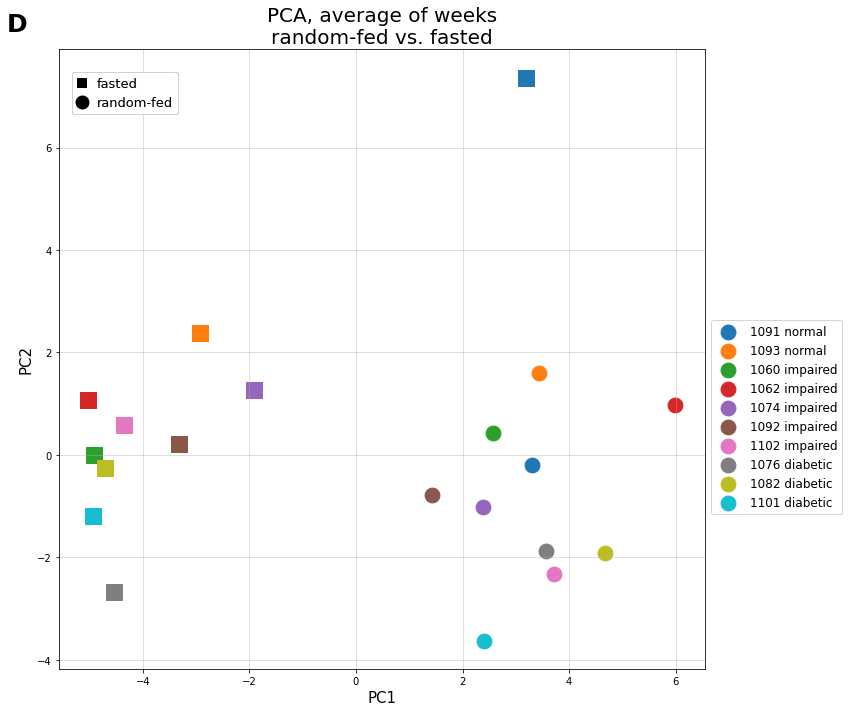

In [12]:
df = tf

animal_avg_df = pd.DataFrame()

for tolerance_type in bg_dict:
    for rat_label in bg_dict[tolerance_type]:
        for bg_type in ['RBG', 'FBG']:
            cols = metab_file_grouping[  (metab_file_grouping['animal'] == rat_label)\
                                 & (metab_file_grouping['bg_type'] == bg_type)\
                                 & (metab_file_grouping['quant_file'] == True )]['File Name']
            animal_avg_df[f'{tolerance_type}_{rat_label}_{bg_type}'] = df[cols].mean(axis=1)
            
pca_data = animal_avg_df.T
pca_data['gluc_tol'] = pca_data.index.str.split('_').str[0]
pca_data['rat_label'] = pca_data.index.str.split('_').str[1]
pca_data['bg_type'] = pca_data.index.str.split('_').str[2]
# display(pca_data)
# 
# pca_data = df[quant_files].T
# display(pca_data.index)

# idx = pca_data.index.to_frame()
# idx = idx.reset_index().drop(0, axis=1)
# display(idx)

n_components = 2
pca = PCA(n_components=n_components)

# Standard scaler is important for PCA
scaled = StandardScaler().fit_transform(pca_data.drop(['bg_type', 'rat_label', 'gluc_tol'], axis=1))
fitted = pca.fit_transform(scaled)
# auto-name PCA columns as pc1, pc2... based on n_components
columns = ['pc' + str(x) for x in range(1, n_components + 1)]
fitted = pd.DataFrame(fitted, columns=columns)

# restore the bg and rat labels into the df
pca_data = pd.concat([fitted, pca_data.reset_index()[['bg_type', 'rat_label', 'gluc_tol']]], axis=1)

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('PCA, average of weeks\nrandom-fed vs. fasted', fontsize = 20)

markers = ['o', 's']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
          'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
# colors = [plt.get_cmap('Dark2')(i) for i in range(1, 11)]

handles = []

for rat_label, color in zip(animals_used, colors):
    for bg_type, marker in zip(['RBG', 'FBG'], markers):
        tolerance_type = animal_to_tolerance_dict[rat_label]
        edge_color = None
        if tolerance_type == 'diabetic':
            edge_color = 'lightgray'
        elif tolerance_type == 'impaired':
            edge_color = 'darkgray'
        else: 
            edge_color = 'black'

        scatter_points = pca_data[(pca_data['gluc_tol'] == tolerance_type) & \
                                  (pca_data['rat_label'] == str(rat_label)) & \
                                  (pca_data['bg_type'] == bg_type)]
        
        handle = ax.scatter(scatter_points['pc1'],
                            scatter_points['pc2'],
                            c = color,
                            marker=marker,
#                             edgecolors=edge_color,
#                             linewidths=3,              # linewidths is stroke size of marker outline
                            s = (250 if marker == 's' else 220),
                            )
#         # Annotate the plot with letter for Diabetic, Normal, Impaired
#         ax.annotate(tolerance_type[0].upper(), 
#                     xy=(scatter_points['pc1']-0.5, scatter_points['pc2']-0.7), 
#                     fontsize=20,
#                     color='black')
    
        # define the text label for the data handle for the legend:
#         gluc_tol = animal_phenotypes[animal_phenotypes['animal'] == rat_label]['glucose_tolerance'].values[0]
        handle.set_label(str(rat_label) + ' ' + tolerance_type )
        handles.append(handle)
        
# ax.legend(['RBG sample', 'FBG sample'],)
ax.grid(alpha=0.5)
plt.tight_layout()

legend_labels = []
for animal in animals_used:
    animal_data = animal_phenotypes[animal_phenotypes['animal'] == animal]
    gluc_tol = animal_data['glucose_tolerance'].values[0]
    label = str(animal) + ' ' + gluc_tol
    legend_labels.append(label)
    
# Sort legend_labels based on normal/impaired/diabetic substring
# legend_labels.sort(key = lambda x: x.split(' ')[1])

handles, labels = ax.get_legend_handles_labels()

# print(handles, labels)
legend = ax.legend(handles[::2], labels[::2], loc=(1.01, 0.25), fontsize=12)

# legend = ax.legend(labels=legend_labels, loc=(1.01, 0.7))

legend2 = ax.legend(handles=[mpatches.Rectangle(xy=(0, 0), width=1, height=1, color='black', label='fasted', ),
                   Line2D([0], [0], marker='o', color='white', label='random-fed', 
                          markerfacecolor='black', markersize=15)], loc=(0.02, 0.895), fontsize=13, handlelength=0.7)
ax.add_artist(legend)
ax.add_artist(legend2)

# ax.legend(handles=[mpatches.Rectangle(xy=(0, 0), width=1, height=1, color='black', label='FBG'),
#                    mpatches.Circle(xy=(0, 0), color='black', label='RBG')], loc=(1.01, 0.98))

ax.text(-0.08, 1.03, "D", transform=ax.transAxes, fontsize=25, weight='bold')

plt.tight_layout()

In [6]:
df = tf

pca_data = df.drop(df.filter(regex='Blank|Water|QC1|QC2').columns, axis=1).filter(regex='.raw').T

# Populate rat_label and bg_type columns in PCA df from file_grouping
# (pd.merge() is similar to inner join in SQL) 
pca_data = pd.merge(pca_data, 
                    file_grouping[['fr_name', 'rat_label', 'bg_type']],
                    how='inner', 
                    left_on=pca_data.index, 
                    right_on='fr_name',)\
                    .set_index(pca_data.index).drop('fr_name', axis=1)

n_components = 2
pca = PCA(n_components=n_components)

# Standard scaler is a little important for PCA
scaled = StandardScaler().fit_transform(pca_data.drop(['bg_type', 'rat_label'], axis=1))
fitted = pca.fit_transform(scaled)
# auto-name PCA columns as pc1, pc2... based on n_components
columns = ['pc' + str(x) for x in range(1, n_components + 1)]
fitted = pd.DataFrame(fitted, columns=columns)

# restore the bg and rat labels into the df
pca_data = pd.concat([fitted, pca_data.reset_index()[['bg_type', 'rat_label']]], axis=1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('PCA, blood glucose sample type', fontsize=20)
targets = ['RBG', 'FBG']
target_colors = ['blue', 'orange']
markers = ['o', 's']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
          'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
# colors = [plt.get_cmap('Dark2')(i) for i in range(1, 11)]

for target, color in zip(targets, target_colors):
    scatter_points = pca_data[(pca_data['bg_type'] == target)] 
    ax.scatter(scatter_points['pc1'],
               scatter_points['pc2'],
               c = color,
               cmap='viridis',
               s = 60)
ax.legend(['Random sampling', 'Fasted sampling'],)
ax.grid(alpha=0.5)
plt.tight_layout()

ax.text(-0.08, 1.03, "A", transform=ax.transAxes, fontsize=25, weight='bold')

# plt.savefig(r'..\reports\collaborator reports\preliminary 20210812\figures\PCA colored by BG.png')

NameError: name 'file_grouping' is not defined